In [2]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
import seaborn as sns 

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


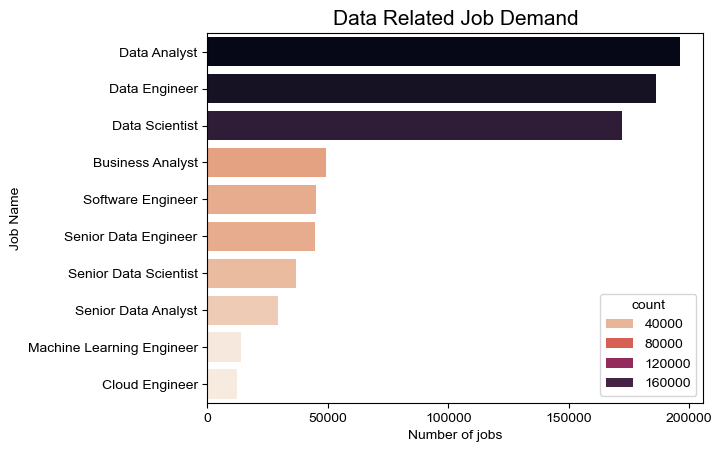

In [3]:
df_plot = df['job_title_short'].value_counts().to_frame()
g = sns.barplot(df_plot, x='count', y='job_title_short', hue='count', palette='rocket_r')
sns.set_theme(style="ticks", font_scale=1.25)
g.set(
    xlabel='Number of jobs',
    ylabel='Job Name',
    title='Data Related Job Demand',
)
plt.show()



In [7]:
top_jobs = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_indemand = df[df['job_title_short'].isin(top_jobs)]
df_indemand = df_indemand.explode('job_skills')
df_indemand_count = df_indemand.groupby('job_skills')['job_skills'].agg(['count'])
df_indemand_count = df_indemand_count.sort_values(by='count', ascending=False).head(10)
df_indemand_count

,count
job_skills,
sql,284540
python,278923
r,102217
aws,97352
tableau,94666
azure,93251
excel,92909
spark,82971
power bi,73939


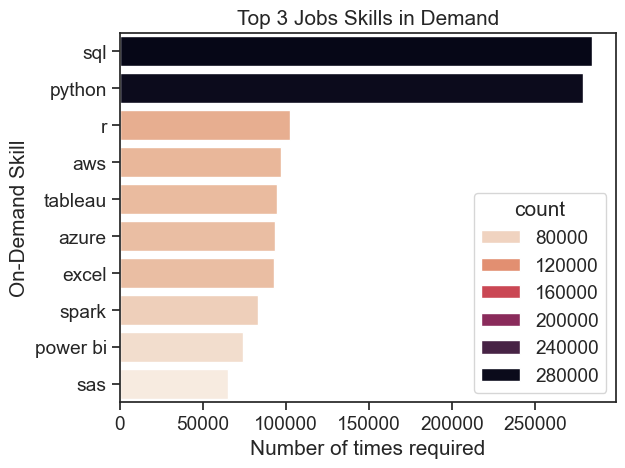

In [9]:

h = sns.barplot(df_indemand_count,x='count', y='job_skills', hue='count', palette='rocket_r')
sns.set_theme(style="ticks", font_scale=1.25)
h.set(
    xlabel='Number of times required',
    ylabel='On-Demand Skill',
    title='Top 3 Jobs Skills in Demand',
)
plt.show()

In [10]:
df_indemand_da = df[df['job_title_short'] == 'Data Analyst']
df_indemand_da = df_indemand_da.explode('job_skills')
df_indemand_da_count = df_indemand_da.groupby('job_skills')['job_skills'].agg(['count'])
df_indemand_da_count = df_indemand_da_count.sort_values(by='count', ascending=False).head(10)
df_indemand_da_count

,count
job_skills,
sql,92428
excel,66860
python,57190
tableau,46455
power bi,39380
r,29996
sas,27998
powerpoint,13822
word,13562


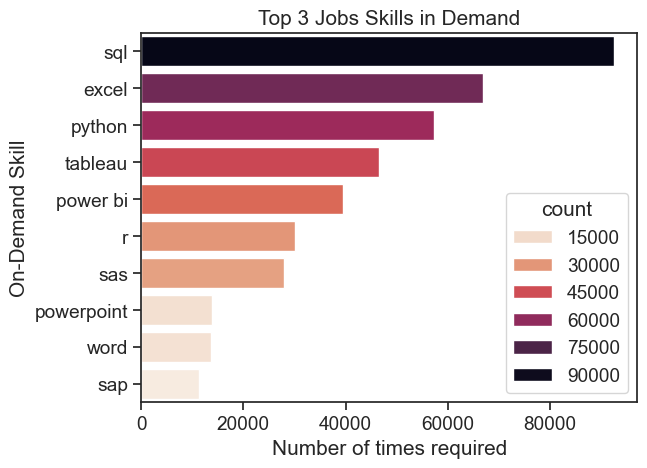

In [12]:

j = sns.barplot(df_indemand_da_count,x='count', y='job_skills', hue='count', palette='rocket_r')
sns.set_theme(style="ticks", font_scale=1.25)
j.set(
    xlabel='Number of times required',
    ylabel='On-Demand Skill',
    title='Top 3 Jobs Skills in Demand',
)
plt.show()

In [14]:
df_spain = df[(df['job_country'] == 'Spain') & (df['job_title_short'] == 'Data Analyst')]
df_plot_location = df_spain['job_location'].value_counts().head(10).to_frame()
df_plot_location

,count
job_location,
"Madrid, Spain",2461
Spain,769
Anywhere,382
"Barcelona, Spain",340
"Valencia, Spain",222
"Boadilla del Monte, Spain",117
"Zaragoza, Spain",71
"Bilbao, Spain",63
"Seville, Spain",47


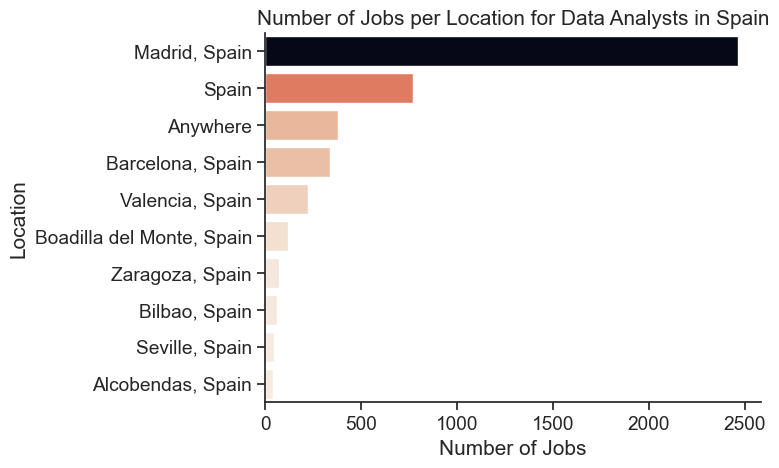

In [25]:
s = sns.barplot(df_plot_location, x='count', y='job_location', hue='count', palette='rocket_r', legend=False)
sns.set_theme(style="ticks", font_scale=1.25)
s.set(
    title = 'Number of Jobs per Location for Data Analysts in Spain',
    xlabel = 'Number of Jobs',
    ylabel = 'Location'
)
sns.despine()
plt.show()


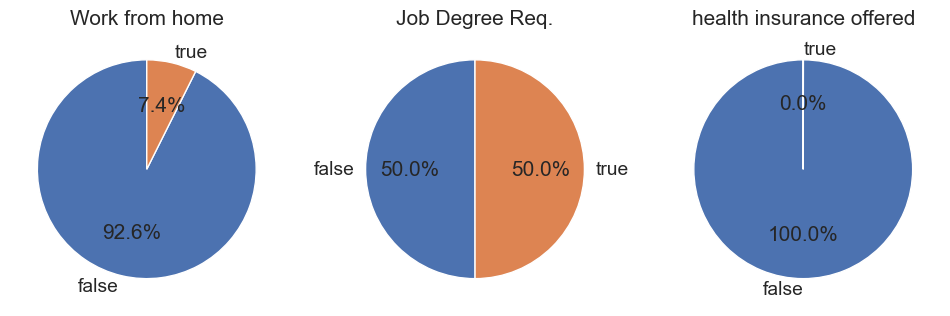

In [22]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12,5))
#use a dictionary to determine the index and the value for each chart 
dict_column ={
    'job_work_from_home': 'Work from home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'health insurance offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_spain[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['false', 'true'])
    ax[i].set_title(title)
    plt.tight_layout

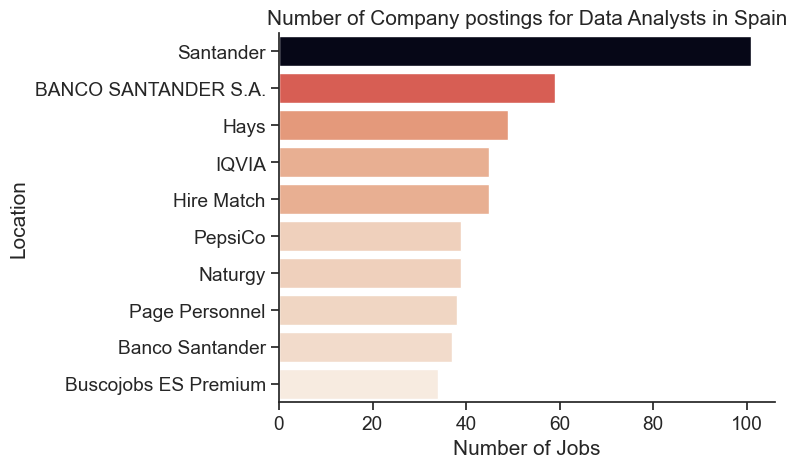

In [29]:
df_plot_companyname = df_spain['company_name'].value_counts().head(10).to_frame()
c = sns.barplot(df_plot_companyname, x='count', y='company_name', hue='count', palette='rocket_r', legend=False)
sns.set_theme(style="ticks", font_scale=1.25)
c.set(
    title = 'Number of Company postings for Data Analysts in Spain',
    xlabel = 'Number of Jobs',
    ylabel = 'Location'
)
sns.despine()
plt.show()